**Install Library**

In [ ]:
!pip install pandas matplotlib seaborn nltk wordcloud

**Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**Baca Dataset**

In [ ]:
# Load data
file_path = '/content/dataset_pipi.csv'
data = pd.read_csv(file_path)

# Tampilkan 5 baris pertama
print(data.head())

                                            komentar
0  Luarbiasa anak anak muda kreatif ini, semoga s...
1  Ini orang gila banget sih imajinasinya..dan ri...
2  Thank you Alffy for making these videos for us...
3  saya asal sumatera barat, sangat bangga meliha...
4  Selain kagum banget sama kak alffy.... Saya ju...


**Eksplorasi Data**

In [ ]:
# Informasi data
print(data.info())

# Jumlah data
print(f"Jumlah komentar: {len(data)}")

# Cek data kosong
print(data.isnull().sum())

# Jika ada data kosong, hapus atau tangani
data.dropna(subset=['komentar'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   komentar  999 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB
None
Jumlah komentar: 999
komentar    0
dtype: int64


**Cleaning Data (Preprocessing)**

In [ ]:
# Stopwords Bahasa Indonesia
!pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
import re
nltk.download('punkt_tab')

stop_factory = StopWordRemoverFactory()
stopwords_id = stop_factory.get_stop_words()

# Daftar stopwords tambahan
custom_stopwords = ['yg', '..', '...', 'bang', 'alffy', 'selalu', 'nya', 'alfy', 'team']

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Hilangkan tanda baca
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords_id and word not in custom_stopwords]
    # Hapus kata dengan panjang <= 1 karakter
    words = [word for word in words if len(word) > 1]
    return ' '.join(words)

# Terapkan preprocessing pada kolom komentar
data['cleaned_komentar'] = data['komentar'].apply(clean_text)

# Cek hasil
print(data[['komentar', 'cleaned_komentar']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                            komentar  \
0  Luarbiasa anak anak muda kreatif ini, semoga s...   
1  Ini orang gila banget sih imajinasinya..dan ri...   
2  Thank you Alffy for making these videos for us...   
3  saya asal sumatera barat, sangat bangga meliha...   
4  Selain kagum banget sama kak alffy.... Saya ju...   

                                    cleaned_komentar  
0  luarbiasa anak anak muda kreatif semoga sukses...  
1  orang gila banget sih imajinasinyadan risetnya...  
2  thank you for making these videos for us to le...  
3  asal sumatera barat sangat bangga melihat vide...  
4  kagum banget sama kak kagum sama pilot dronenn...  


**Analisis Sentimen**

sentimen
netral     875
positif    116
negatif      8
Name: count, dtype: int64


<ipython-input-25-c9b9f93bd4ab>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentimen', data=data, palette='viridis')


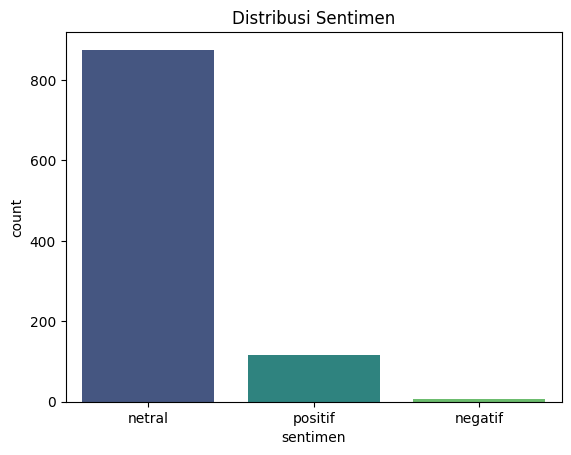

In [ ]:
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positif'
    elif score['compound'] <= -0.05:
        return 'negatif'
    else:
        return 'netral'

# Tambahkan kolom sentimen
data['sentimen'] = data['cleaned_komentar'].apply(analyze_sentiment)

# Tampilkan distribusi sentimen
print(data['sentimen'].value_counts())
sns.countplot(x='sentimen', data=data, palette='viridis')
plt.title('Distribusi Sentimen')
plt.show()

**Word Cloud**

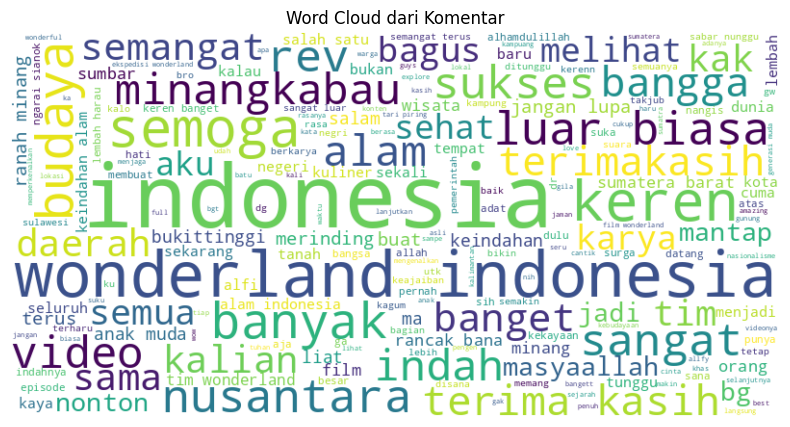

In [ ]:
text = ' '.join(data['cleaned_komentar'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Komentar')
plt.show()

**Visualisasi Lainnya**

<ipython-input-29-1913db0f31b2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=common_words_df, palette='magma')


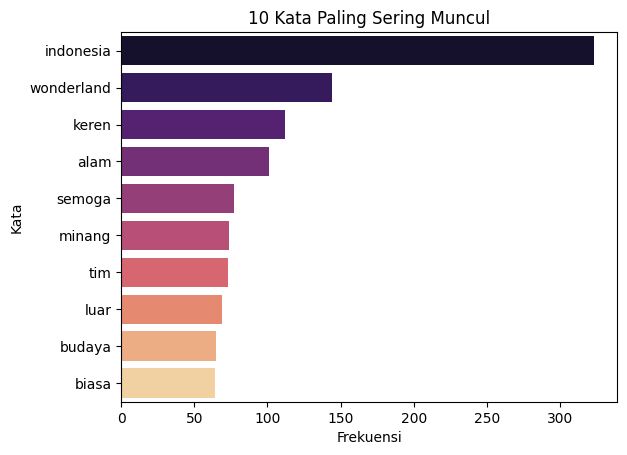

         Kata  Frekuensi
0   indonesia        323
1  wonderland        144
2       keren        112
3        alam        101
4      semoga         77
5      minang         74
6         tim         73
7        luar         69
8      budaya         65
9       biasa         64


In [ ]:
from collections import Counter

# Tokenize semua kata
all_words = ' '.join(data['cleaned_komentar']).split()
word_freq = Counter(all_words)

# Ambil 10 kata paling sering
most_common_words = word_freq.most_common(10)

# Visualisasi
common_words_df = pd.DataFrame(most_common_words, columns=['Kata', 'Frekuensi'])

sns.barplot(x='Frekuensi', y='Kata', data=common_words_df, palette='magma')
plt.title('10 Kata Paling Sering Muncul')
plt.show()

print(common_words_df)

**Distribusi Panjang Komentar**

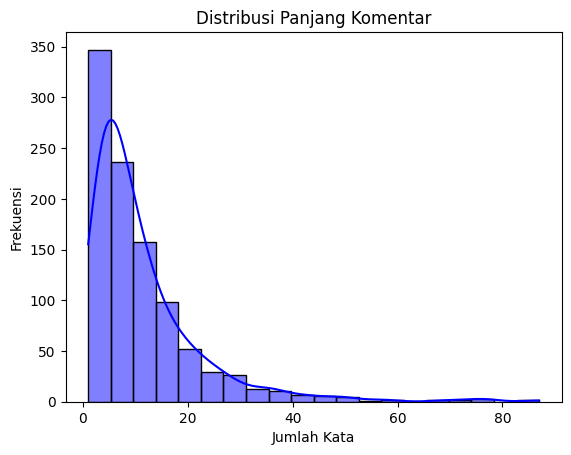

In [ ]:
data['panjang_komentar'] = data['cleaned_komentar'].apply(lambda x: len(x.split()))

sns.histplot(data['panjang_komentar'], bins=20, kde=True, color='blue')
plt.title('Distribusi Panjang Komentar')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()